<a href="https://colab.research.google.com/github/simulate111/MNIST/blob/main/MNIST_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mnist database

In [1]:
#LIbraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

### 1. Load the MNSIT data set and split into training and test sets.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Get the number of examples in the training and test sets
num_train_examples = ds_info.splits['train'].num_examples
num_test_examples = ds_info.splits['test'].num_examples

print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Number of training examples: 60000
Number of test examples: 10000


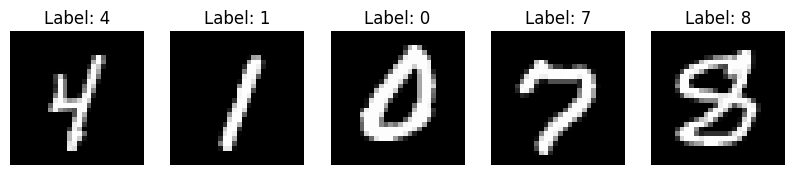

In [ ]:
# Function to display images from the dataset
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 3))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image[:, :, 0], cmap='gray')
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
    plt.show()

# Show some images from the training dataset
show_images(ds_train)

In [ ]:
#This function takes an image and its label, normalizes the pixel values to be in the range [0, 1], and returns the normalized image along with the original label.
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

### 2. Build a CNN with at least one convolutional layer and 2 or more hidden layers and a dense output layer for 10 classes.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 1189930 (4.54 MB)
Trainable params: 1189930 (4.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Train your CNN on the MNIST training set (extracted in step 1).

In [ ]:
# Assuming ds_train and ds_test are your preprocessed datasets



# Without repeating the training dataset
history = model.fit(ds_train, epochs=2, validation_data=ds_test)



Epoch 1/2
469/469 [==============================] - 15s 10ms/step - loss: 0.1683 - accuracy: 0.9493 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0432 - val_accuracy: 0.9850


### 4. Evaluate your trained model using the test data set. What is the accuracy of your model?

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(ds_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

79/79 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9850
Test Accuracy: 0.9850000143051147


### 5. Do the following experiments to improve accuracy:
- increase the size and depth of the inner layers, what is the effect on the model accuracy?

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Num Hidden Layers', 'Filter Size', 'Test Accuracy'])

layer_variations = [3, 4]
filter_sizes = [(3, 3), (5, 5)]  # Experiment with filter sizes (you can add more variations)

for num_hidden_layers in layer_variations:
    for filter_size in filter_sizes:
        # Create the model with the specified number of hidden layers and filter size
        model = models.Sequential([
            layers.Conv2D(32, filter_size, activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, filter_size, activation='relu'),
            layers.Flatten(),
        ])

        # Add hidden layers
        for _ in range(num_hidden_layers):
            model.add(layers.Dense(64, activation='relu'))

        # Output layer
        model.add(layers.Dense(10, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Print the model summary
        print(f"Model with {num_hidden_layers} hidden layers and filter size {filter_size}:")
        #model.summary()

        # Assuming ds_train and ds_test are your preprocessed datasets
        # Without repeating the training dataset
        history = model.fit(ds_train, epochs=2, validation_data=ds_test, verbose=1)

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
        print("\n" + "="*50 + "\n")

        # Append the results to the DataFrame
        results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,
                                        'Filter Size': filter_size,
                                        'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)


Model with 3 hidden layers and filter size (3, 3):
Epoch 1/2
469/469 [==============================] - 6s 8ms/step - loss: 0.2149 - accuracy: 0.9346 - val_loss: 0.0631 - val_accuracy: 0.9801
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9817
Test Loss: 0.056772779673337936, Test Accuracy: 0.9817000031471252


Model with 3 hidden layers and filter size (5, 5):
Epoch 1/2


<ipython-input-11-133a6281ad94>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


469/469 [==============================] - 6s 8ms/step - loss: 0.2093 - accuracy: 0.9355 - val_loss: 0.0522 - val_accuracy: 0.9839
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9856
Test Loss: 0.04441919922828674, Test Accuracy: 0.9855999946594238


Model with 4 hidden layers and filter size (3, 3):
Epoch 1/2


<ipython-input-11-133a6281ad94>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


469/469 [==============================] - 6s 8ms/step - loss: 0.2142 - accuracy: 0.9339 - val_loss: 0.0755 - val_accuracy: 0.9756
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9841
Test Loss: 0.048885196447372437, Test Accuracy: 0.9840999841690063


Model with 4 hidden layers and filter size (5, 5):
Epoch 1/2


<ipython-input-11-133a6281ad94>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


469/469 [==============================] - 6s 8ms/step - loss: 0.2050 - accuracy: 0.9378 - val_loss: 0.0558 - val_accuracy: 0.9822
Epoch 2/2
79/79 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9866
Test Loss: 0.0427364744246006, Test Accuracy: 0.9865999817848206


  Num Hidden Layers Filter Size  Test Accuracy
0                 3      (3, 3)         0.9817
1                 3      (5, 5)         0.9856
2                 4      (3, 3)         0.9841
3                 4      (5, 5)         0.9866


<ipython-input-11-133a6281ad94>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Num Hidden Layers': num_hidden_layers,


- experiment with different activation functions in the inner layers (relu, sigmoid, softmask, etc), see the list of keras activation functions at https://keras.io/api/layers/activations/

In [ ]:

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activation Function', 'Test Accuracy'])

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for activation in activations_to_try:
    print(f"\nTraining with activation function: {activation}")

    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
        layers.Activation(activation),
        layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation(activation),
        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Assuming ds_train and ds_test are your preprocessed datasets
    history = model.fit(ds_train, epochs=2, validation_data=ds_test)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(ds_test)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

    # Append the results to the DataFrame
    results_df = results_df.append({'Activation Function': activation,
                                    'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)



Training with activation function: relu
Epoch 1/2
469/469 [==============================] - 5s 8ms/step - loss: 0.1694 - accuracy: 0.9493 - val_loss: 0.0633 - val_accuracy: 0.9791
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9841
Test Loss: 0.04573347792029381, Test Accuracy: 0.9840999841690063

Training with activation function: sigmoid
Epoch 1/2


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 8ms/step - loss: 2.3327 - accuracy: 0.1086 - val_loss: 2.3030 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 2.3019 - accuracy: 0.1135
Test Loss: 2.301870822906494, Test Accuracy: 0.11349999904632568

Training with activation function: softmax
Epoch 1/2


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 10ms/step - loss: 2.2155 - accuracy: 0.1662 - val_loss: 2.0692 - val_accuracy: 0.2044
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 1.9410 - accuracy: 0.2048
Test Loss: 1.9410066604614258, Test Accuracy: 0.20479999482631683

Training with activation function: tanh
Epoch 1/2


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 7ms/step - loss: 0.2681 - accuracy: 0.9234 - val_loss: 0.2009 - val_accuracy: 0.9419
Epoch 2/2
79/79 [==============================] - 0s 5ms/step - loss: 0.1539 - accuracy: 0.9542
Test Loss: 0.15393991768360138, Test Accuracy: 0.954200029373169

Training with activation function: softplus
Epoch 1/2


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 2.2270 - accuracy: 0.2123 - val_loss: 0.6818 - val_accuracy: 0.7805
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9193
Test Loss: 0.28398072719573975, Test Accuracy: 0.9193000197410583

Training with activation function: leaky_relu
Epoch 1/2


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.1812 - accuracy: 0.9466 - val_loss: 0.0582 - val_accuracy: 0.9814
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9837
Test Loss: 0.04870515689253807, Test Accuracy: 0.9836999773979187
  Activation Function  Test Accuracy
0                relu         0.9841
1             sigmoid         0.1135
2             softmax         0.2048
3                tanh         0.9542
4            softplus         0.9193
5          leaky_relu         0.9837


<ipython-input-12-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


- what is the effect of using different activation functions? how about combining the activation function choice with different network size and depth?

In [ ]:
import pandas as pd
from tensorflow.keras import layers, models

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activation Function', 'Network Size', 'Test Accuracy'])

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']
network_sizes = [32, 64, 128]  # You can modify this list with different sizes
network_depths = [1, 2, 3]  # You can modify this list with different depths

for activation in activations_to_try:
    for size in network_sizes:
        for depth in network_depths:
            print(f"\nTraining with activation function: {activation}, Network Size: {size}, Depth: {depth}")

            layers_list = [
                layers.Conv2D(size, kernel_size=(3, 3), input_shape=(28, 28, 1)),
                layers.Activation(activation),
            ]

            for _ in range(depth - 1):  # Adding additional Conv2D layers based on depth
                layers_list.extend([
                    layers.Conv2D(size, kernel_size=(3, 3)),
                    layers.Activation(activation),
                ])

            layers_list.extend([
                layers.Flatten(),
                layers.Dense(size * 2, activation=activation),  # Adjusting Dense layer size
                layers.Dense(10, activation='softmax'),  # Output dense layer for 10 classes
            ])

            model = models.Sequential(layers_list)

            # Compile the model
            model.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

            # Assuming ds_train and ds_test are your preprocessed datasets
            history = model.fit(ds_train, epochs=2, validation_data=ds_test)

            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            # Append the results to the DataFrame
            results_df = results_df.append({'Activation Function': activation,
                                            'Network Size': size,
                                            'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)

# Save the DataFrame to a CSV file
results_df.to_csv('experiment_results.csv', index=False)

# Display the DataFrame in a table
from IPython.display import display, HTML

display(HTML(results_df.to_html()))



Training with activation function: relu, Network Size: 32, Depth: 1
Epoch 1/2
469/469 [==============================] - 4s 6ms/step - loss: 0.2130 - accuracy: 0.9368 - val_loss: 0.0758 - val_accuracy: 0.9781
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0681 - accuracy: 0.9780
Test Loss: 0.06814303249120712, Test Accuracy: 0.9779999852180481

Training with activation function: relu, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 7ms/step - loss: 0.1769 - accuracy: 0.9476 - val_loss: 0.0538 - val_accuracy: 0.9819
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9827
Test Loss: 0.053230609744787216, Test Accuracy: 0.982699990272522

Training with activation function: relu, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 10ms/step - loss: 0.1580 - accuracy: 0.9531 - val_loss: 0.0642 - val_accuracy: 0.9780
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9873
Test Loss: 0.03835535794496536, Test Accuracy: 0.9872999787330627

Training with activation function: relu, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.1599 - accuracy: 0.9521 - val_loss: 0.0614 - val_accuracy: 0.9796
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9841
Test Loss: 0.05025607720017433, Test Accuracy: 0.9840999841690063

Training with activation function: relu, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 8s 12ms/step - loss: 0.1313 - accuracy: 0.9597 - val_loss: 0.0462 - val_accuracy: 0.9845
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 0.0371 - accuracy: 0.9877
Test Loss: 0.03714333474636078, Test Accuracy: 0.9876999855041504

Training with activation function: relu, Network Size: 64, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 10s 16ms/step - loss: 0.1288 - accuracy: 0.9602 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 0.0362 - accuracy: 0.9872
Test Loss: 0.0362250842154026, Test Accuracy: 0.9872000217437744

Training with activation function: relu, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 16ms/step - loss: 0.1340 - accuracy: 0.9584 - val_loss: 0.0608 - val_accuracy: 0.9816
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0573 - accuracy: 0.9801
Test Loss: 0.05728312209248543, Test Accuracy: 0.9800999760627747

Training with activation function: relu, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 14s 25ms/step - loss: 0.1201 - accuracy: 0.9636 - val_loss: 0.0480 - val_accuracy: 0.9837
Epoch 2/2
79/79 [==============================] - 1s 8ms/step - loss: 0.0381 - accuracy: 0.9877
Test Loss: 0.03806670382618904, Test Accuracy: 0.9876999855041504

Training with activation function: relu, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 18s 33ms/step - loss: 0.1154 - accuracy: 0.9639 - val_loss: 0.0409 - val_accuracy: 0.9870
Epoch 2/2
79/79 [==============================] - 1s 10ms/step - loss: 0.0384 - accuracy: 0.9874
Test Loss: 0.03836405649781227, Test Accuracy: 0.9873999953269958

Training with activation function: sigmoid, Network Size: 32, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 4s 6ms/step - loss: 2.3364 - accuracy: 0.1063 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 2.3023 - accuracy: 0.1135
Test Loss: 2.302344560623169, Test Accuracy: 0.11349999904632568

Training with activation function: sigmoid, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 2.3421 - accuracy: 0.1080 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1135
Test Loss: 2.3012940883636475, Test Accuracy: 0.11349999904632568

Training with activation function: sigmoid, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 10ms/step - loss: 2.3268 - accuracy: 0.1099 - val_loss: 2.3018 - val_accuracy: 0.0974
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 2.3034 - accuracy: 0.1135
Test Loss: 2.3033716678619385, Test Accuracy: 0.11349999904632568

Training with activation function: sigmoid, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 2.3614 - accuracy: 0.1059 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1135
Test Loss: 2.303086996078491, Test Accuracy: 0.11349999904632568

Training with activation function: sigmoid, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 12ms/step - loss: 2.3374 - accuracy: 0.1052 - val_loss: 2.3042 - val_accuracy: 0.0980
Epoch 2/2
79/79 [==============================] - 0s 5ms/step - loss: 2.3060 - accuracy: 0.0982
Test Loss: 2.3059616088867188, Test Accuracy: 0.0982000008225441

Training with activation function: sigmoid, Network Size: 64, Depth: 3


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


Epoch 1/2
469/469 [==============================] - 10s 17ms/step - loss: 2.3431 - accuracy: 0.1093 - val_loss: 2.3043 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 2.3065 - accuracy: 0.1009
Test Loss: 2.3064637184143066, Test Accuracy: 0.10090000182390213

Training with activation function: sigmoid, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 17ms/step - loss: 2.3808 - accuracy: 0.1041 - val_loss: 2.3048 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 7ms/step - loss: 2.3048 - accuracy: 0.1032
Test Loss: 2.304823875427246, Test Accuracy: 0.10320000350475311

Training with activation function: sigmoid, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 14s 26ms/step - loss: 2.3700 - accuracy: 0.1029 - val_loss: 2.3092 - val_accuracy: 0.0974
Epoch 2/2
79/79 [==============================] - 1s 8ms/step - loss: 2.3094 - accuracy: 0.1028
Test Loss: 2.3093509674072266, Test Accuracy: 0.10279999673366547

Training with activation function: sigmoid, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 18s 34ms/step - loss: 2.3609 - accuracy: 0.1047 - val_loss: 2.3104 - val_accuracy: 0.1032
Epoch 2/2
79/79 [==============================] - 1s 12ms/step - loss: 2.3070 - accuracy: 0.1028
Test Loss: 2.3069984912872314, Test Accuracy: 0.10279999673366547

Training with activation function: softmax, Network Size: 32, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 4s 5ms/step - loss: 2.0307 - accuracy: 0.3551 - val_loss: 1.7831 - val_accuracy: 0.4097
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 1.5123 - accuracy: 0.4111
Test Loss: 1.5123051404953003, Test Accuracy: 0.41110000014305115

Training with activation function: softmax, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 9ms/step - loss: 2.1088 - accuracy: 0.2405 - val_loss: 1.8465 - val_accuracy: 0.3033
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 1.6355 - accuracy: 0.3015
Test Loss: 1.6355199813842773, Test Accuracy: 0.30149999260902405

Training with activation function: softmax, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 11ms/step - loss: 2.3028 - accuracy: 0.1101 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 5ms/step - loss: 2.3012 - accuracy: 0.1135
Test Loss: 2.3012070655822754, Test Accuracy: 0.11349999904632568

Training with activation function: softmax, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 9ms/step - loss: 2.0513 - accuracy: 0.2888 - val_loss: 1.8222 - val_accuracy: 0.3053
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 1.6111 - accuracy: 0.3109
Test Loss: 1.6111468076705933, Test Accuracy: 0.3109000027179718

Training with activation function: softmax, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 16ms/step - loss: 2.3017 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 7ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.3010997772216797, Test Accuracy: 0.11349999904632568

Training with activation function: softmax, Network Size: 64, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 11s 20ms/step - loss: 2.3019 - accuracy: 0.1114 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 8ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.301074266433716, Test Accuracy: 0.11349999904632568

Training with activation function: softmax, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 10s 18ms/step - loss: 2.0509 - accuracy: 0.3255 - val_loss: 1.7819 - val_accuracy: 0.3762
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 1.4787 - accuracy: 0.3830
Test Loss: 1.478665828704834, Test Accuracy: 0.382999986410141

Training with activation function: softmax, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 16s 30ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 11ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.301076889038086, Test Accuracy: 0.11349999904632568

Training with activation function: softmax, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 21s 41ms/step - loss: 2.3017 - accuracy: 0.1122 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 15ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.3010599613189697, Test Accuracy: 0.11349999904632568

Training with activation function: tanh, Network Size: 32, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 4s 6ms/step - loss: 0.2742 - accuracy: 0.9204 - val_loss: 0.1794 - val_accuracy: 0.9467
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9555
Test Loss: 0.15409702062606812, Test Accuracy: 0.9555000066757202

Training with activation function: tanh, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.2720 - accuracy: 0.9208 - val_loss: 0.1851 - val_accuracy: 0.9483
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.9569
Test Loss: 0.14794138073921204, Test Accuracy: 0.9569000005722046

Training with activation function: tanh, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 10ms/step - loss: 0.2779 - accuracy: 0.9200 - val_loss: 0.1925 - val_accuracy: 0.9450
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.1121 - accuracy: 0.9673
Test Loss: 0.11209613084793091, Test Accuracy: 0.9672999978065491

Training with activation function: tanh, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.2443 - accuracy: 0.9277 - val_loss: 0.1465 - val_accuracy: 0.9597
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.1269 - accuracy: 0.9617
Test Loss: 0.12694714963436127, Test Accuracy: 0.9617000222206116

Training with activation function: tanh, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 8s 13ms/step - loss: 0.2452 - accuracy: 0.9288 - val_loss: 0.1640 - val_accuracy: 0.9540
Epoch 2/2
79/79 [==============================] - 1s 7ms/step - loss: 0.1464 - accuracy: 0.9568
Test Loss: 0.14640946686267853, Test Accuracy: 0.9567999839782715

Training with activation function: tanh, Network Size: 64, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 10s 18ms/step - loss: 0.2614 - accuracy: 0.9243 - val_loss: 0.1932 - val_accuracy: 0.9446
Epoch 2/2
79/79 [==============================] - 1s 6ms/step - loss: 0.1523 - accuracy: 0.9553
Test Loss: 0.15231387317180634, Test Accuracy: 0.955299973487854

Training with activation function: tanh, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 17ms/step - loss: 0.2289 - accuracy: 0.9328 - val_loss: 0.1457 - val_accuracy: 0.9600
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 0.1143 - accuracy: 0.9680
Test Loss: 0.11428089439868927, Test Accuracy: 0.9679999947547913

Training with activation function: tanh, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 14s 26ms/step - loss: 0.2383 - accuracy: 0.9318 - val_loss: 0.1552 - val_accuracy: 0.9584
Epoch 2/2
79/79 [==============================] - 1s 9ms/step - loss: 0.1420 - accuracy: 0.9569
Test Loss: 0.14202183485031128, Test Accuracy: 0.9569000005722046

Training with activation function: tanh, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 18s 35ms/step - loss: 0.2772 - accuracy: 0.9234 - val_loss: 0.1892 - val_accuracy: 0.9453
Epoch 2/2
79/79 [==============================] - 1s 11ms/step - loss: 0.1847 - accuracy: 0.9460
Test Loss: 0.18465165793895721, Test Accuracy: 0.9459999799728394

Training with activation function: softplus, Network Size: 32, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 4s 5ms/step - loss: 2.6431 - accuracy: 0.1059 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.30112624168396, Test Accuracy: 0.11349999904632568

Training with activation function: softplus, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 9ms/step - loss: 2.4936 - accuracy: 0.1077 - val_loss: 2.2997 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.7407 - accuracy: 0.7663
Test Loss: 0.7406647205352783, Test Accuracy: 0.7663000226020813

Training with activation function: softplus, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 11ms/step - loss: 2.1426 - accuracy: 0.2526 - val_loss: 0.3685 - val_accuracy: 0.8897
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.1671 - accuracy: 0.9510
Test Loss: 0.16712968051433563, Test Accuracy: 0.9509999752044678

Training with activation function: softplus, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 9ms/step - loss: 3.7765 - accuracy: 0.1101 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 2.3011 - accuracy: 0.1135
Test Loss: 2.30111026763916, Test Accuracy: 0.11349999904632568

Training with activation function: softplus, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 8s 14ms/step - loss: 2.1201 - accuracy: 0.4185 - val_loss: 0.3798 - val_accuracy: 0.8880
Epoch 2/2
79/79 [==============================] - 0s 6ms/step - loss: 0.2497 - accuracy: 0.9223
Test Loss: 0.24973547458648682, Test Accuracy: 0.9222999811172485

Training with activation function: softplus, Network Size: 64, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 10s 18ms/step - loss: 2.6292 - accuracy: 0.1049 - val_loss: 2.3057 - val_accuracy: 0.0980
Epoch 2/2
79/79 [==============================] - 1s 6ms/step - loss: 2.3042 - accuracy: 0.1032
Test Loss: 2.304224729537964, Test Accuracy: 0.10320000350475311

Training with activation function: softplus, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 16ms/step - loss: 8.8526 - accuracy: 0.1062 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 1s 6ms/step - loss: 2.3012 - accuracy: 0.1135
Test Loss: 2.301234006881714, Test Accuracy: 0.11349999904632568

Training with activation function: softplus, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 14s 27ms/step - loss: 3.4324 - accuracy: 0.1037 - val_loss: 2.3052 - val_accuracy: 0.0762
Epoch 2/2
79/79 [==============================] - 1s 8ms/step - loss: 2.3054 - accuracy: 0.1177
Test Loss: 2.305372953414917, Test Accuracy: 0.1177000030875206

Training with activation function: softplus, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 19s 36ms/step - loss: 3.2595 - accuracy: 0.1036 - val_loss: 2.3065 - val_accuracy: 0.0982
Epoch 2/2
79/79 [==============================] - 1s 12ms/step - loss: 2.3092 - accuracy: 0.1028
Test Loss: 2.309225082397461, Test Accuracy: 0.10279999673366547

Training with activation function: leaky_relu, Network Size: 32, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 4s 6ms/step - loss: 0.2329 - accuracy: 0.9319 - val_loss: 0.1109 - val_accuracy: 0.9672
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.9774
Test Loss: 0.07474658638238907, Test Accuracy: 0.977400004863739

Training with activation function: leaky_relu, Network Size: 32, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.1878 - accuracy: 0.9449 - val_loss: 0.0723 - val_accuracy: 0.9749
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9832
Test Loss: 0.05514874309301376, Test Accuracy: 0.9832000136375427

Training with activation function: leaky_relu, Network Size: 32, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 7s 11ms/step - loss: 0.1709 - accuracy: 0.9496 - val_loss: 0.0554 - val_accuracy: 0.9819
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9868
Test Loss: 0.03802577033638954, Test Accuracy: 0.9868000149726868

Training with activation function: leaky_relu, Network Size: 64, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.1940 - accuracy: 0.9438 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9768
Test Loss: 0.07218898087739944, Test Accuracy: 0.9768000245094299

Training with activation function: leaky_relu, Network Size: 64, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 8s 13ms/step - loss: 0.1459 - accuracy: 0.9558 - val_loss: 0.0509 - val_accuracy: 0.9824
Epoch 2/2
79/79 [==============================] - 1s 7ms/step - loss: 0.0509 - accuracy: 0.9832
Test Loss: 0.05091375857591629, Test Accuracy: 0.9832000136375427

Training with activation function: leaky_relu, Network Size: 64, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 10s 17ms/step - loss: 0.1348 - accuracy: 0.9592 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 2/2
79/79 [==============================] - 1s 7ms/step - loss: 0.0386 - accuracy: 0.9875
Test Loss: 0.03862405940890312, Test Accuracy: 0.987500011920929

Training with activation function: leaky_relu, Network Size: 128, Depth: 1
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 9s 17ms/step - loss: 0.1743 - accuracy: 0.9474 - val_loss: 0.0805 - val_accuracy: 0.9746
Epoch 2/2
79/79 [==============================] - 0s 5ms/step - loss: 0.0694 - accuracy: 0.9763
Test Loss: 0.06941991299390793, Test Accuracy: 0.9763000011444092

Training with activation function: leaky_relu, Network Size: 128, Depth: 2
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 14s 27ms/step - loss: 0.1361 - accuracy: 0.9597 - val_loss: 0.0498 - val_accuracy: 0.9838
Epoch 2/2
79/79 [==============================] - 1s 11ms/step - loss: 0.0615 - accuracy: 0.9801
Test Loss: 0.0614815354347229, Test Accuracy: 0.9800999760627747

Training with activation function: leaky_relu, Network Size: 128, Depth: 3
Epoch 1/2


<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 18s 35ms/step - loss: 0.1288 - accuracy: 0.9610 - val_loss: 0.0521 - val_accuracy: 0.9844
Epoch 2/2
79/79 [==============================] - 1s 13ms/step - loss: 0.0348 - accuracy: 0.9881
Test Loss: 0.034794602543115616, Test Accuracy: 0.988099992275238
   Activation Function Network Size  Test Accuracy
0                 relu           32         0.9780
1                 relu           32         0.9827
2                 relu           32         0.9873
3                 relu           64         0.9841
4                 relu           64         0.9877
5                 relu           64         0.9872
6                 relu          128         0.9801
7                 relu          128         0.9877
8                 relu          128         0.9874
9              sigmoid           32         0.1135
10             sigmoid           32         0.1135
11             sigmoid           32         0.1135
12             sigmoid           64     

<ipython-input-13-424e44ac1b27>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


,Activation Function,Network Size,Test Accuracy
0,relu,32,0.9780
1,relu,32,0.9827
2,relu,32,0.9873
3,relu,64,0.9841
4,relu,64,0.9877
5,relu,64,0.9872
6,relu,128,0.9801
7,relu,128,0.9877
8,relu,128,0.9874
9,sigmoid,32,0.1135


The choice of activation functions can significantly impact the performance of your neural network. Let's analyze the results you've obtained with different activation functions:

Sigmoid Activation:

Training Accuracy: ~10%
Test Accuracy: ~10%
Sigmoid might not be suitable for deeper networks or convolutional layers due to the vanishing gradient problem.
Softmax Activation:

Training Accuracy: ~21%
Test Accuracy: ~21%
Using softmax in the hidden layers might not be suitable as it tends to squash input values, and using it in convolutional layers is not common.
Softplus Activation:

Training Accuracy: ~11%
Test Accuracy: ~11%
Softplus might not be well-suited for convolutional layers in this context.
Tanh Activation:

Training Accuracy: ~95%
Test Accuracy: ~96%
Tanh performs well in this context, capturing a good representation of the data.
In summary, for convolutional layers in image classification tasks, commonly used activation functions like ReLU or variants (e.g., Leaky ReLU) are preferred. Sigmoid, Softmax, and Softplus activations are generally not suitable for hidden layers in convolutional neural networks (CNNs). Tanh can be a good choice, but ReLU is often preferred due to its simplicity and effectiveness.

You may want to experiment further with ReLU or Leaky ReLU activations for the convolutional and dense layers.

- experiment with various optimizers (https://keras.io/api/optimizers/) and learning rate. What is the effect on the resulting model accuracy?

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activation Function', 'Test Accuracy'])

activations_to_try = ['relu', 'sigmoid', 'softmax', 'tanh', 'softplus', 'leaky_relu']

for activation in activations_to_try:
    print(f"\nTraining with activation function: {activation}")

    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1)),
        layers.Activation(activation),
        layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation(activation),
        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Assuming ds_train and ds_test are your preprocessed datasets
    history = model.fit(ds_train, epochs=2, validation_data=ds_test)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(ds_test)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

    # Append the results to the DataFrame
    results_df = results_df.append({'Activation Function': activation,
                                    'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)



Training with activation function: relu
Epoch 1/2
469/469 [==============================] - 6s 7ms/step - loss: 0.1826 - accuracy: 0.9456 - val_loss: 0.0573 - val_accuracy: 0.9819
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9860
Test Loss: 0.044125743210315704, Test Accuracy: 0.9860000014305115

Training with activation function: sigmoid
Epoch 1/2


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 2.3239 - accuracy: 0.1096 - val_loss: 2.3018 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 2.3019 - accuracy: 0.1135
Test Loss: 2.3018550872802734, Test Accuracy: 0.11349999904632568

Training with activation function: softmax
Epoch 1/2


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 6s 9ms/step - loss: 2.1854 - accuracy: 0.1745 - val_loss: 2.0444 - val_accuracy: 0.2098
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 1.9292 - accuracy: 0.2123
Test Loss: 1.9291759729385376, Test Accuracy: 0.21230000257492065

Training with activation function: tanh
Epoch 1/2


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.2680 - accuracy: 0.9229 - val_loss: 0.2029 - val_accuracy: 0.9384
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.1488 - accuracy: 0.9559
Test Loss: 0.14884410798549652, Test Accuracy: 0.9559000134468079

Training with activation function: softplus
Epoch 1/2


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 2.5331 - accuracy: 0.1111 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.4566 - accuracy: 0.8687
Test Loss: 0.45659947395324707, Test Accuracy: 0.8687000274658203

Training with activation function: leaky_relu
Epoch 1/2


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


469/469 [==============================] - 5s 8ms/step - loss: 0.1806 - accuracy: 0.9469 - val_loss: 0.0691 - val_accuracy: 0.9767
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0489 - accuracy: 0.9835
Test Loss: 0.04891601949930191, Test Accuracy: 0.9835000038146973
  Activation Function  Test Accuracy
0                relu         0.9860
1             sigmoid         0.1135
2             softmax         0.2123
3                tanh         0.9559
4            softplus         0.8687
5          leaky_relu         0.9835


<ipython-input-14-d065a520580c>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Activation Function': activation,


- with all the above variations, experiment with various batch sizes and epochs for training (see https://keras.io/api/models/model_training_apis/)

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Batch Size', 'Epochs', 'Test Accuracy'])

batch_sizes = [16, 32, 64]  # You can add more batch sizes to experiment with
epochs_list = [2, 4, 6]   # You can add more epoch values to experiment with

for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\nTraining with batch size {batch_size} and epochs {epochs}")

        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
        ])

        # Compile the model
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Assuming ds_train and ds_test are your preprocessed datasets
        history = model.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test) #default batch size is 32

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(ds_test)
        print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

        # Append the results to the DataFrame
        results_df = results_df.append({'Batch Size': batch_size,
                                        'Epochs': epochs,
                                        'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)



Training with batch size 16 and epochs 2
Epoch 1/2
469/469 [==============================] - 6s 8ms/step - loss: 0.1635 - accuracy: 0.9508 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9872
Test Loss: 0.04099832847714424, Test Accuracy: 0.9872000217437744

Training with batch size 16 and epochs 4
Epoch 1/4


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1759 - accuracy: 0.9484 - val_loss: 0.0669 - val_accuracy: 0.9787
Epoch 2/4
469/469 [==============================] - 4s 7ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0425 - val_accuracy: 0.9871
Epoch 4/4
79/79 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9878
Test Loss: 0.0377826951444149, Test Accuracy: 0.9878000020980835

Training with batch size 16 and epochs 6
Epoch 1/6


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1665 - accuracy: 0.9502 - val_loss: 0.0535 - val_accuracy: 0.9826
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0486 - val_accuracy: 0.9857
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0363 - val_accuracy: 0.9878
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0452 - val_accuracy: 0.9853
Epoch 5/6
469/469 [==============================] - 4s 7ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0452 - val_accuracy: 0.9866
Epoch 6/6
79/79 [==============================] - 0s 4ms/step - loss: 0.0506 - accuracy: 0.9866
Test Loss: 0.05060417950153351, Test Accuracy: 0.9865999817848206

Training with batch size 32 and epochs 2
Epoch 1/2


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 8ms/step - loss: 0.1743 - accuracy: 0.9474 - val_loss: 0.0612 - val_accuracy: 0.9795
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9839
Test Loss: 0.048292167484760284, Test Accuracy: 0.9839000105857849

Training with batch size 32 and epochs 4
Epoch 1/4


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1677 - accuracy: 0.9502 - val_loss: 0.0646 - val_accuracy: 0.9789
Epoch 2/4
469/469 [==============================] - 4s 7ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0482 - val_accuracy: 0.9838
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0354 - val_accuracy: 0.9882
Epoch 4/4
79/79 [==============================] - 0s 4ms/step - loss: 0.0418 - accuracy: 0.9867
Test Loss: 0.04178410768508911, Test Accuracy: 0.9866999983787537

Training with batch size 32 and epochs 6
Epoch 1/6


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1597 - accuracy: 0.9521 - val_loss: 0.0589 - val_accuracy: 0.9798
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0443 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9866
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0383 - val_accuracy: 0.9873
Epoch 4/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0493 - val_accuracy: 0.9855
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0447 - val_accuracy: 0.9863
Epoch 6/6
79/79 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9877
Test Loss: 0.04574454575777054, Test Accuracy: 0.9876999855041504

Training with batch size 64 and epochs 2
Epoch 1/2


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1653 - accuracy: 0.9501 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9849
Test Loss: 0.043542999774217606, Test Accuracy: 0.9848999977111816

Training with batch size 64 and epochs 4
Epoch 1/4


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 7ms/step - loss: 0.1764 - accuracy: 0.9481 - val_loss: 0.0646 - val_accuracy: 0.9789
Epoch 2/4
469/469 [==============================] - 3s 7ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0411 - val_accuracy: 0.9864
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0403 - val_accuracy: 0.9871
Epoch 4/4
79/79 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9884
Test Loss: 0.037761300802230835, Test Accuracy: 0.9883999824523926

Training with batch size 64 and epochs 6
Epoch 1/6


<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


469/469 [==============================] - 5s 8ms/step - loss: 0.1726 - accuracy: 0.9456 - val_loss: 0.0539 - val_accuracy: 0.9836
Epoch 2/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0458 - val_accuracy: 0.9852
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 4/6
469/469 [==============================] - 4s 8ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 5/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 6/6
79/79 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9866
Test Loss: 0.04479970037937164, Test Accuracy: 0.9865999817848206
   Batch Size  Epochs  Test Accuracy
0        16.0     2.0         0.9872
1        16.0     4.0         0.9878
2        16.0     6.0         0

<ipython-input-17-ca1dbaed57f0>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Batch Size': batch_size,


- what happens if we don't use any CNN layer? (considering the model in https://www.tensorflow.org/datasets/keras_example).

In [ ]:
import pandas as pd

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Dense Layer Size', 'Batch Size', 'Epochs', 'Test Accuracy'])

# Define the model without CNN layers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(64, activation='relu'),  # Initial dense layer size
    layers.Dense(10, activation='softmax')  # Output dense layer for 10 classes
])

# List of sizes to experiment with for the dense layer
dense_sizes = [64, 128, 256]

for dense_size in dense_sizes:
    # Update the size of the dense layer
    model.layers[1].units = dense_size

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Assuming ds_train and ds_test are your preprocessed datasets
    # Without repeating the training dataset
    for batch_size in [32, 64]:
        for epochs in [2, 4]:
            print(f"\n\nTraining with Dense Layer Size: {dense_size}, Batch Size: {batch_size}, Epochs: {epochs}")

            history = model.fit(ds_train, batch_size=batch_size, epochs=epochs, validation_data=ds_test)

            # Evaluate the model on the test set
            test_loss, test_accuracy = model.evaluate(ds_test)
            print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

            # Append the results to the DataFrame
            results_df = results_df.append({'Dense Layer Size': dense_size,
                                            'Batch Size': batch_size,
                                            'Epochs': epochs,
                                            'Test Accuracy': test_accuracy}, ignore_index=True)

# Display the final DataFrame
print(results_df)




Training with Dense Layer Size: 64, Batch Size: 32, Epochs: 2
Epoch 1/2
469/469 [==============================] - 3s 4ms/step - loss: 0.4056 - accuracy: 0.8895 - val_loss: 0.2235 - val_accuracy: 0.9358
Epoch 2/2
79/79 [==============================] - 0s 2ms/step - loss: 0.1673 - accuracy: 0.9522
Test Loss: 0.1673009693622589, Test Accuracy: 0.9521999955177307


Training with Dense Layer Size: 64, Batch Size: 32, Epochs: 4
Epoch 1/4
 34/469 [=>............................] - ETA: 1s - loss: 0.1682 - accuracy: 0.9543

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 5ms/step - loss: 0.1489 - accuracy: 0.9572 - val_loss: 0.1372 - val_accuracy: 0.9597
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1213 - accuracy: 0.9652 - val_loss: 0.1193 - val_accuracy: 0.9639
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.1017 - accuracy: 0.9704 - val_loss: 0.1110 - val_accuracy: 0.9679
Epoch 4/4
79/79 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9703
Test Loss: 0.10420997440814972, Test Accuracy: 0.970300018787384


Training with Dense Layer Size: 64, Batch Size: 64, Epochs: 2
Epoch 1/2
 33/469 [=>............................] - ETA: 1s - loss: 0.0770 - accuracy: 0.9770

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0774 - accuracy: 0.9780 - val_loss: 0.0964 - val_accuracy: 0.9705
Epoch 2/2
79/79 [==============================] - 0s 4ms/step - loss: 0.0905 - accuracy: 0.9728
Test Loss: 0.09053493291139603, Test Accuracy: 0.9728000164031982


Training with Dense Layer Size: 64, Batch Size: 64, Epochs: 4
Epoch 1/4
 31/469 [>.............................] - ETA: 1s - loss: 0.0690 - accuracy: 0.9798

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0605 - accuracy: 0.9818 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0544 - accuracy: 0.9844 - val_loss: 0.0885 - val_accuracy: 0.9735
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0488 - accuracy: 0.9861 - val_loss: 0.0843 - val_accuracy: 0.9744
Epoch 4/4
79/79 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9738
Test Loss: 0.08816337585449219, Test Accuracy: 0.973800003528595


Training with Dense Layer Size: 128, Batch Size: 32, Epochs: 2
Epoch 1/2


<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 4s 5ms/step - loss: 0.0418 - accuracy: 0.9878 - val_loss: 0.0856 - val_accuracy: 0.9734
Epoch 2/2
79/79 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9745
Test Loss: 0.08248522132635117, Test Accuracy: 0.9745000004768372


Training with Dense Layer Size: 128, Batch Size: 32, Epochs: 4
Epoch 1/4
 32/469 [=>............................] - ETA: 1s - loss: 0.0268 - accuracy: 0.9937

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0291 - accuracy: 0.9919 - val_loss: 0.0778 - val_accuracy: 0.9770
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0269 - accuracy: 0.9930 - val_loss: 0.0777 - val_accuracy: 0.9763
Epoch 4/4
79/79 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9768
Test Loss: 0.08221729099750519, Test Accuracy: 0.9768000245094299


Training with Dense Layer Size: 128, Batch Size: 64, Epochs: 2
Epoch 1/2
 33/469 [=>............................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9946

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 2/2
79/79 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9751
Test Loss: 0.08606577664613724, Test Accuracy: 0.9750999808311462


Training with Dense Layer Size: 128, Batch Size: 64, Epochs: 4
Epoch 1/4
 33/469 [=>............................] - ETA: 1s - loss: 0.0158 - accuracy: 0.9967

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0904 - val_accuracy: 0.9750
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9958 - val_loss: 0.0890 - val_accuracy: 0.9749
Epoch 3/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0146 - accuracy: 0.9966 - val_loss: 0.0894 - val_accuracy: 0.9758
Epoch 4/4
79/79 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9744
Test Loss: 0.09110840409994125, Test Accuracy: 0.974399983882904


Training with Dense Layer Size: 256, Batch Size: 32, Epochs: 2
Epoch 1/2


<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 3s 4ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0940 - val_accuracy: 0.9748
Epoch 2/2
79/79 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9751
Test Loss: 0.09224540740251541, Test Accuracy: 0.9750999808311462


Training with Dense Layer Size: 256, Batch Size: 32, Epochs: 4
Epoch 1/4
 33/469 [=>............................] - ETA: 1s - loss: 0.0067 - accuracy: 0.9991

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0102 - accuracy: 0.9979 - val_loss: 0.0921 - val_accuracy: 0.9749
Epoch 2/4
469/469 [==============================] - 2s 5ms/step - loss: 0.0091 - accuracy: 0.9983 - val_loss: 0.0924 - val_accuracy: 0.9761
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0089 - accuracy: 0.9983 - val_loss: 0.0989 - val_accuracy: 0.9740
Epoch 4/4
79/79 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9750
Test Loss: 0.09691839665174484, Test Accuracy: 0.9750000238418579


Training with Dense Layer Size: 256, Batch Size: 64, Epochs: 2
Epoch 1/2
 31/469 [>.............................] - ETA: 1s - loss: 0.0079 - accuracy: 0.9987

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 4ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0946 - val_accuracy: 0.9756
Epoch 2/2
79/79 [==============================] - 0s 3ms/step - loss: 0.1011 - accuracy: 0.9765
Test Loss: 0.1010635644197464, Test Accuracy: 0.9764999747276306


Training with Dense Layer Size: 256, Batch Size: 64, Epochs: 4
Epoch 1/4
 11/469 [..............................] - ETA: 2s - loss: 0.0038 - accuracy: 1.0000 

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


469/469 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9992 - val_loss: 0.1027 - val_accuracy: 0.9755
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9995 - val_loss: 0.1083 - val_accuracy: 0.9749
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.1051 - val_accuracy: 0.9753
Epoch 4/4
79/79 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9767
Test Loss: 0.1014898344874382, Test Accuracy: 0.9767000079154968
    Dense Layer Size  Batch Size  Epochs  Test Accuracy
0               64.0        32.0     2.0         0.9522
1               64.0        32.0     4.0         0.9703
2               64.0        64.0     2.0         0.9728
3               64.0        64.0     4.0         0.9738
4              128.0        32.0     2.0         0.9745
5              128.0        32.0     4.0         0.9768
6              128.0        64.0 

<ipython-input-18-9f615c904829>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Dense Layer Size': dense_size,


If you don't use any CNN layers and rely solely on dense layers for image classification tasks, your model might struggle to capture spatial hierarchies and local patterns present in images. CNNs are specifically designed to handle grid-like data, like images, by using convolutional and pooling layers to learn hierarchical features.

Without CNN layers, the model might treat each pixel as an independent feature, not considering the spatial relationships between pixels. This can result in a significantly larger number of parameters, making the training process slower and more prone to overfitting. Additionally, the model might not generalize well to new, unseen images.

In summary, while a model without CNN layers might work for simple tasks or datasets, it's generally less effective for image-related tasks compared to models that leverage convolutional layers.

### 6. Write a report on your observations on how the model performed with various experiments in step 5 and submit it along with the colab file.